# dPanther News articles demo test with Spacy Library

>This notebook is designed to test some NLP functions from Spacy with dPanther's news and article data

1. FIU dPanther repository: http://dpanther.fiu.edu
2. spaCy python library for NLP in Python: https://spacy.io/ 

- Author: Boyuan (Keven) Guan
- Copyright: Florida International University Library
- Last update: 09/29/2021


In [2]:
# import spacy libarary
import spacy
# load the english model
nlp=spacy.load('en_core_web_sm')

In [22]:
# load data from txt file
with open('CA03400001_00001.txt','r', encoding="utf8") as file:
    data = file.read().replace('\n', '')
    print(data)

Aruba NewsVOL. 4, No. 1Former Commissary EmployeeNow in R.A.F. ReceivesDist. Flying Medal From grinding hamburger to bombingHamburg is the recent history .ofWinston Hynam, former sales clerk atCom-the meat counter in the Colonymissary. Accordingto news receivedhere a short timeago by his brother,who works at theStars and StripesClub, Hynam hasbeen awarded theDistinguished Fly-ing Medal for hiswork in the RoyalAir Force.With service as awireless operator,and as front gunner and bomb aimer,he displayed, according to the citation,outstanding coolness and complete dis-regard for danger in pressing homeattacks on the enemy regardless ofenemy opposition or adverse weather”.Hynam, whose home is in Barbados,worked at the Commissary from October,1938, to April, 1940. He was restlessafter war broke out in 1939, frequentlySaying he was going ’’to bomb ---- outof those Germans”. And he seems tohave carried out his threat.Aki ’riba nos ta mira Winston Hynam.kende recientemente a worde presentacu un

In [23]:
# create a nlp object
doc = nlp(data)

In [24]:
# check the pipe names
nlp.pipe_names

['tagger', 'parser', 'ner']

In [25]:
# use case no.1 Part-of-Speech (POS) 
# In English grammar, the parts of speech tell us what is the function of a word and how it is used in a sentence.
# In this project, this will help to capture the story by fined the pattern of 'who-did-what'

# let's try a simple sample before jump into the actual dataset
testor = nlp("Boyuan Guan was working all day at my home in west Miami and then go to my office at Florida International University to prepare a meeting. Some of my workmates from University of Florida will also join the meeting.")
for token in testor:
    print(token.text, " [parts]--> ", token.pos_, " [dependency]--> ",  token.dep_, ", position: ", token.i, "-", token.idx)

Boyuan  [parts]-->  PROPN  [dependency]-->  compound , position:  0 - 0
Guan  [parts]-->  PROPN  [dependency]-->  nsubj , position:  1 - 7
was  [parts]-->  AUX  [dependency]-->  aux , position:  2 - 12
working  [parts]-->  VERB  [dependency]-->  ROOT , position:  3 - 16
all  [parts]-->  DET  [dependency]-->  det , position:  4 - 24
day  [parts]-->  NOUN  [dependency]-->  npadvmod , position:  5 - 28
at  [parts]-->  ADP  [dependency]-->  prep , position:  6 - 32
my  [parts]-->  DET  [dependency]-->  poss , position:  7 - 35
home  [parts]-->  NOUN  [dependency]-->  pobj , position:  8 - 38
in  [parts]-->  ADP  [dependency]-->  prep , position:  9 - 43
west  [parts]-->  PROPN  [dependency]-->  compound , position:  10 - 46
Miami  [parts]-->  PROPN  [dependency]-->  pobj , position:  11 - 51
and  [parts]-->  CCONJ  [dependency]-->  cc , position:  12 - 57
then  [parts]-->  ADV  [dependency]-->  advmod , position:  13 - 61
go  [parts]-->  VERB  [dependency]-->  conj , position:  14 - 66
to 

In [26]:
print(testor.sentiment)

0.0


In [27]:
testor11 = nlp("I am super happy!!")
print(testor11.sentiment)

0.0


In [28]:
# EXTRACT ONLY THE VERB FROM THE REAL DATA
for token in doc:
    if token.pos_ == 'VERB':
        print(token.text, " [parts]--> ", token.pos_, " [dependency]--> ",  token.dep_, ", position: ", token.i, "-", token.idx)

Flying  [parts]-->  VERB  [dependency]-->  csubj , position:  14 - 77
grinding  [parts]-->  VERB  [dependency]-->  pcomp , position:  17 - 95
bombingHamburg  [parts]-->  VERB  [dependency]-->  pobj , position:  20 - 117
receivedhere  [parts]-->  VERB  [dependency]-->  advmod , position:  42 - 253
works  [parts]-->  VERB  [dependency]-->  relcl , position:  51 - 301
awarded  [parts]-->  VERB  [dependency]-->  ROOT , position:  59 - 350
displayed  [parts]-->  VERB  [dependency]-->  conj , position:  87 - 496
according  [parts]-->  VERB  [dependency]-->  prep , position:  89 - 507
pressing  [parts]-->  VERB  [dependency]-->  pcomp , position:  104 - 592
worked  [parts]-->  VERB  [dependency]-->  ROOT , position:  124 - 709
broke  [parts]-->  VERB  [dependency]-->  advcl , position:  140 - 794
frequentlySaying  [parts]-->  VERB  [dependency]-->  advcl , position:  145 - 813
going  [parts]-->  VERB  [dependency]-->  ccomp , position:  148 - 837
bomb  [parts]-->  VERB  [dependency]-->  xcomp

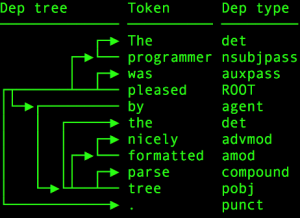

In [29]:
from IPython.display import Image
Image("dep_tree.png")


In [30]:
spacy.explain("nsubj"), spacy.explain("ROOT"), spacy.explain("aux"), spacy.explain("advcl"), spacy.explain("dobj")

('nominal subject',
 None,
 'auxiliary',
 'adverbial clause modifier',
 'direct object')

In [31]:
# Now, let's work on some NER 
for ent in testor.ents:
    print(ent.text, ent.label_)

Boyuan Guan PERSON
all day DATE
west Miami LOC
Florida International University ORG
University of Florida ORG


In [32]:
spacy.explain("GPE"), spacy.explain("CARDINAL"), spacy.explain("WORK_OF_ART"), spacy.explain("LOC"), spacy.explain("EVENT")


('Countries, cities, states',
 'Numerals that do not fall under another type',
 'Titles of books, songs, etc.',
 'Non-GPE locations, mountain ranges, bodies of water',
 'Named hurricanes, battles, wars, sports events, etc.')

In [33]:
# try real data instead
target_ner = 'PERSON'
print (target_ner, ": ", end='')
for ent in doc.ents:
    if ent.label_ == target_ner:
        print(ent.text, ", ", ent.label, "; ", end='')

PERSON : Hynam ,  380 ; GG ,  380 ; L. G. Smith ,  380 ; E W. Martin ,  380 ; W. C. Colby ,  380 ; R. H. Paul ,  380 ; Smith ,  380 ; F. S. Campbell ,  380 ; J. J. Hor gan ,  380 ; P. Branch ,  380 ; E. A. Rankin ,  380 ; L. J. Brewer ,  380 ; B. Teagle ,  380 ; E. G. Ollivierre ,  380 ; L. G. Smithopened ,  380 ; Eotro portret ,  380 ; mas abao ta mustranos ,  380 ; Howard Join ,  380 ; J. HoriganJ. J. Horrigan ,  380 ; F. S. Campbellwill ,  380 ; W. C. Colby ,  380 ; Horigan ,  380 ; J. M. B. HowardJ. M. B. Howard ,  380 ; Howard ,  380 ; Mary-land ,  380 ; Caripito ,  380 ; MarineSuperintendent ,  380 ; ta mustra ,  380 ; Banda ,  380 ; J. J. Horigan ,  380 ; Banda dre-chi ,  380 ; J. M. B. Howard ,  380 ; Departamento ,  380 ; Howard ,  380 ; Caripito ,  380 ; L. G. Smith ,  380 ; N. W.1 ,  380 ; Smith ,  380 ; Comitenan Consultivo ,  380 ; henter mundo ,  380 ; mas grandi ,  380 ; nos obligacionnan ,  380 ; kitafo’i ,  380 ; como empleado-nan ,  380 ; grandi ,  380 ; cada homber ,

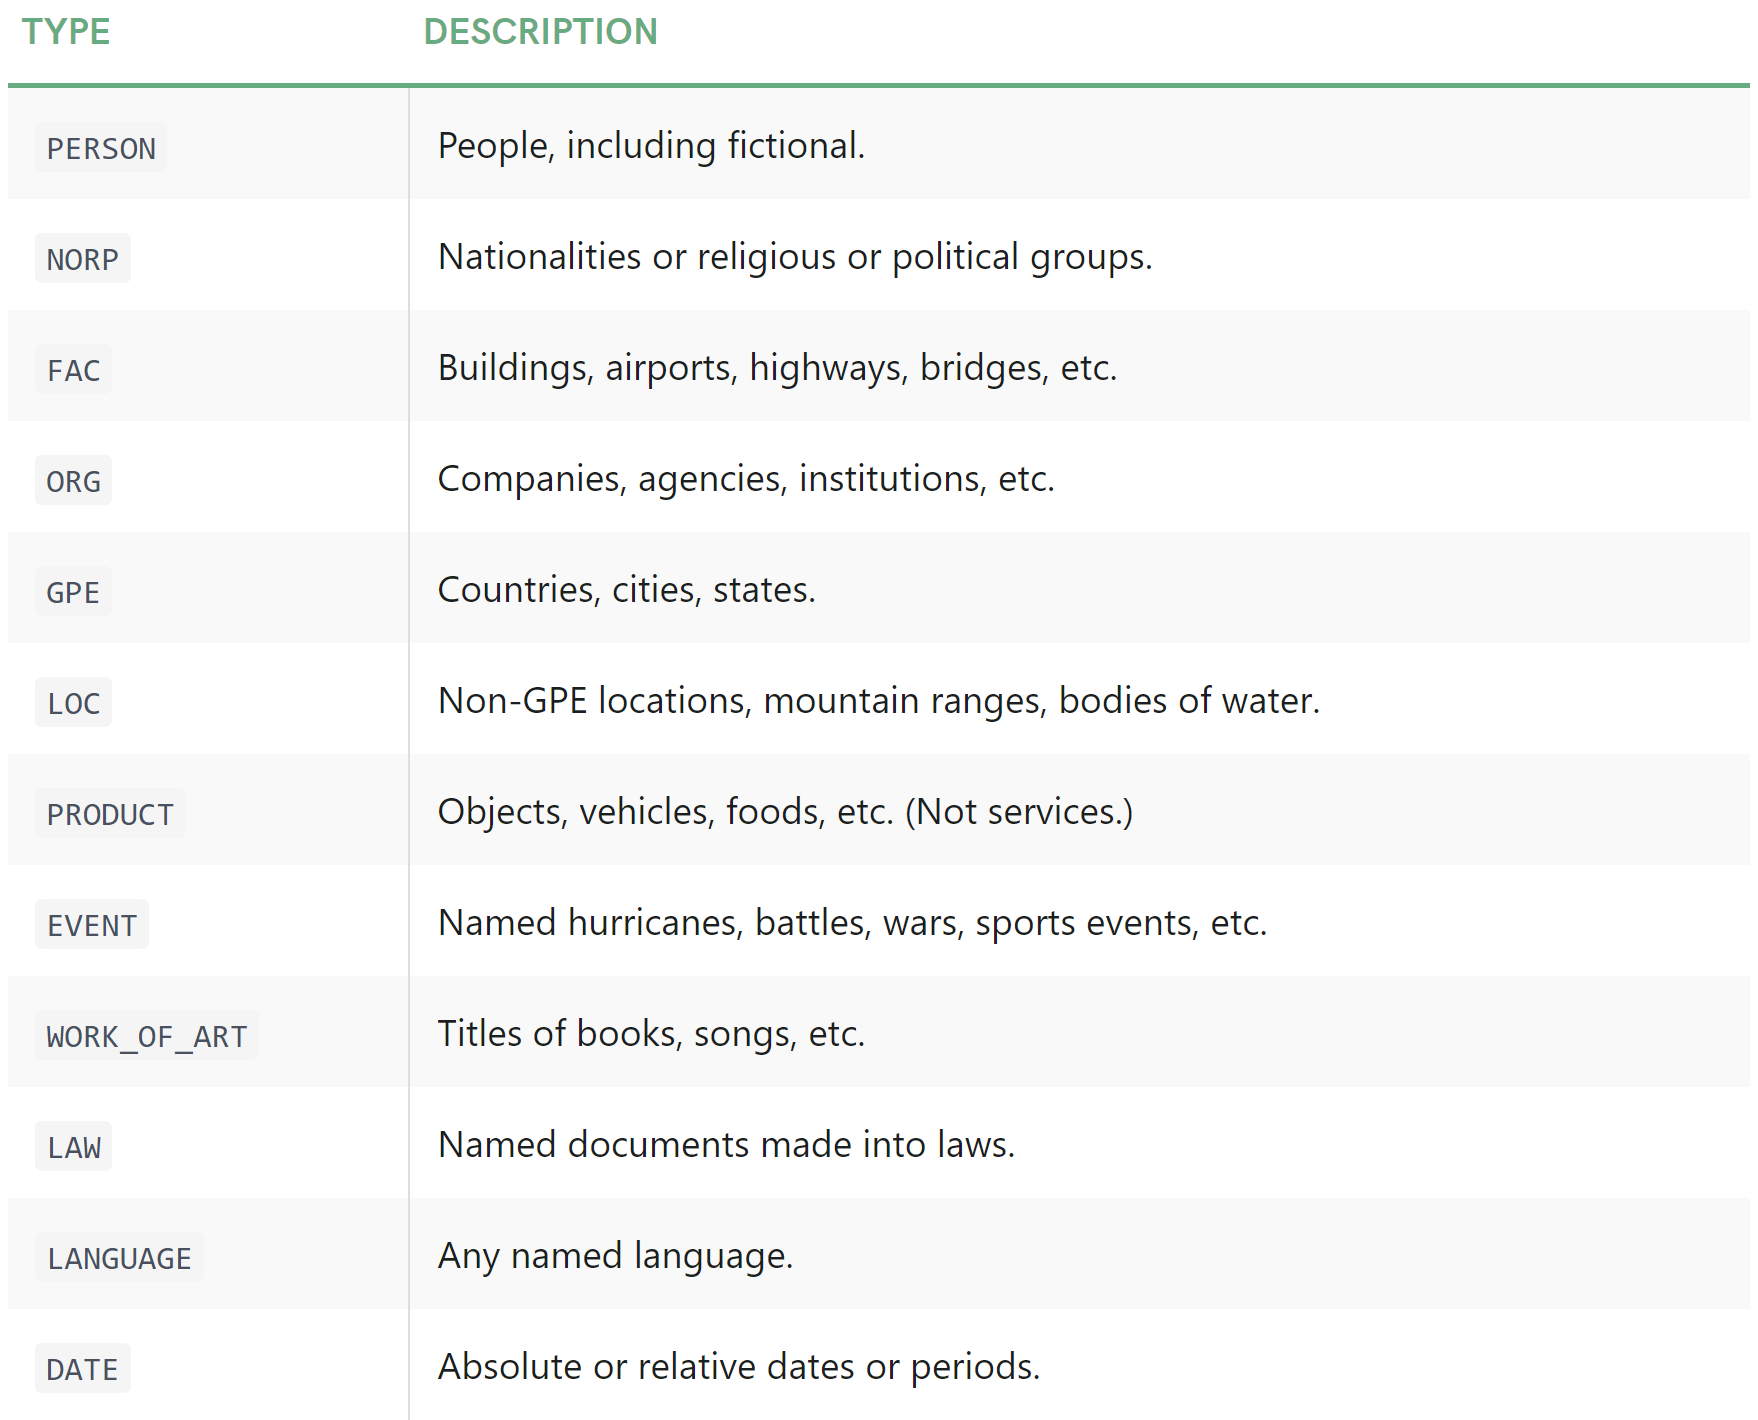

In [34]:
Image("ner_label.png")

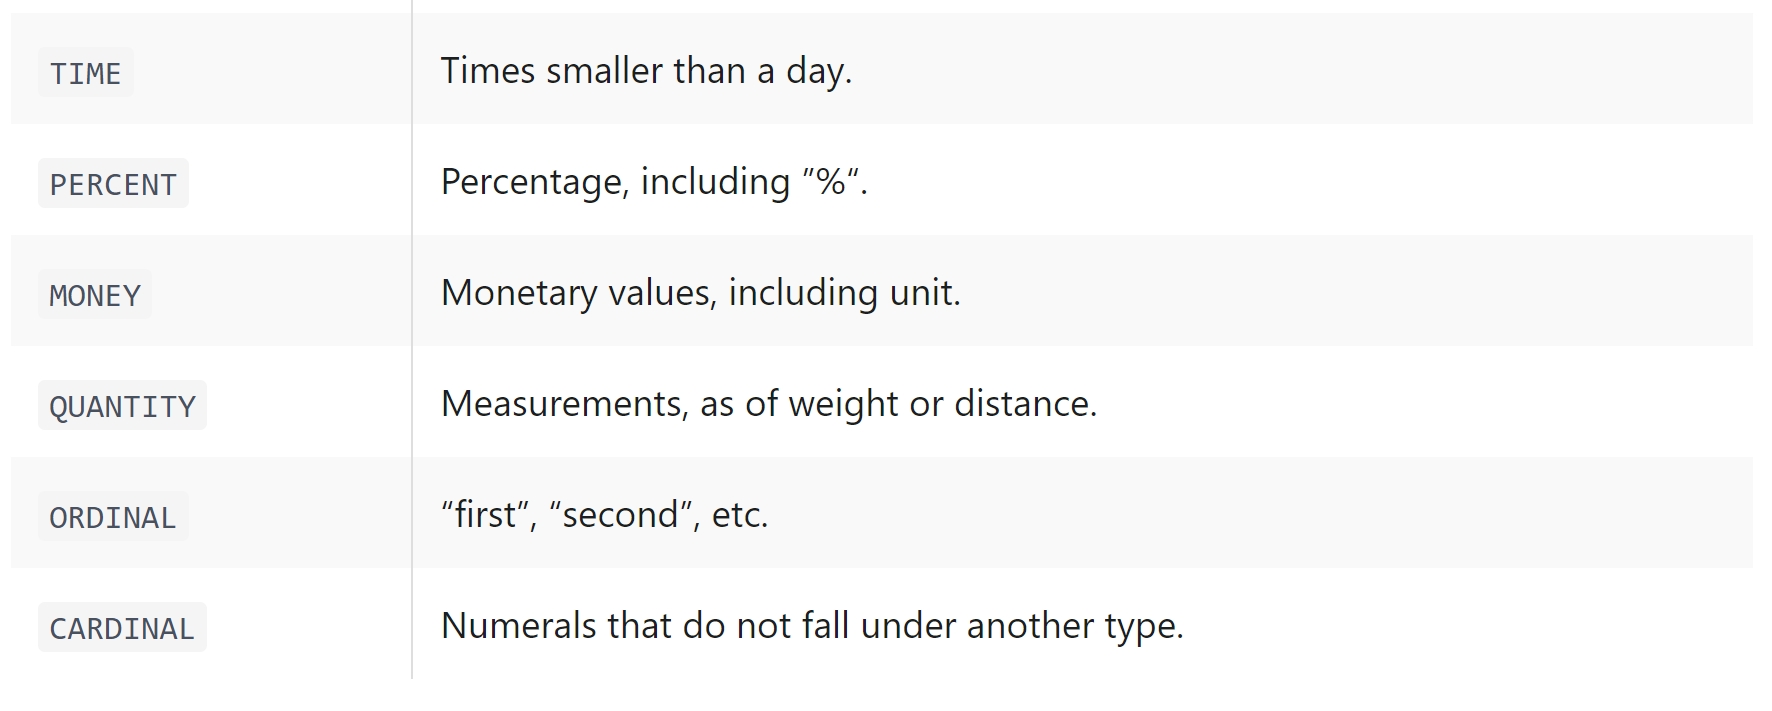

In [15]:
Image("ner_label2.png")

In [35]:
from spacy.lang.en import English
from spacy.pipeline import EntityRuler

nlp = English()
ruler = EntityRuler(nlp)
patterns = [{"label": "GPE", "pattern": "Mississippi"}]
ruler.add_patterns(patterns)
nlp.add_pipe(ruler)

doc = nlp(data)

print([(ent.text, ent.label_) for ent in doc.ents])

[('Mississippi', 'GPE')]


In [36]:
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp(data)
displacy.serve(doc, style="ent")


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [38]:
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Boyuan Guan was working all day at my home in west Miami and then go to my office at Florida International University to prepare a meeting. Some of my workmates from University of Florida will also join the meeting.")
displacy.serve(doc, style="ent")


Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [20]:
testor2 = nlp("Tropical Storm Eta could intensify in the Gulf of Mexico through Wednesday, but is then expected to weaken as it potentially approaches the U.S. Gulf Coast later in the week.Eta is now centered in the southern Gulf of Mexico, where it has now stalled out near the western tip of Cuba.")
for ent in testor2.ents:
    print(ent.text, ent.label_)

the Gulf of Mexico LOC
Wednesday DATE
Gulf Coast LOC
later in the week DATE
Eta ORG
Gulf of Mexico LOC
Cuba GPE


In [14]:
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
# Eta is not recognized as a hurricane 
doc = nlp("After a historical hurricane, Irma, hit south florida, tropical Storm Eta could intensify in the Gulf of Mexico through Wednesday, but is then expected to weaken as it potentially approaches the U.S. Gulf Coast later in the week.Eta is now centered in the southern Gulf of Mexico, where it has now stalled out near the western tip of Cuba.")
displacy.serve(doc, style="ent")

c:\users\bguan\appdata\local\programs\python\python39\lib\site-packages\spacy\displacy\__init__.py:94: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [ ]:
# todo: re-train the NER model to recognize the hurricane name

In [15]:
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
# Eta is not recognized as a hurricane 
doc = nlp("Tropical Storm Eta could intensify in the Gulf of Mexico through Wednesday, but is then expected to weaken as it potentially approaches the U.S. Gulf Coast later in the week.Eta is now centered in the southern Gulf of Mexico, where it has now stalled out near the western tip of Cuba.")
displacy.render(doc, style="ent")

## Start Traning the existing model with new Entity: Hurricane

In [7]:
#!/usr/bin/env python
# coding: utf8
"""Example of training an additional entity type

This script shows how to add a new entity type to an existing pretrained NER
model. To keep the example short and simple, only four sentences are provided
as examples. In practice, you'll need many more — a few hundred would be a
good start. You will also likely need to mix in examples of other entity
types, which might be obtained by running the entity recognizer over unlabelled
sentences, and adding their annotations to the training set.

The actual training is performed by looping over the examples, and calling
`nlp.entity.update()`. The `update()` method steps through the words of the
input. At each word, it makes a prediction. It then consults the annotations
provided on the GoldParse instance, to see whether it was right. If it was
wrong, it adjusts its weights so that the correct action will score higher
next time.

After training your model, you can save it to a directory. We recommend
wrapping models as Python packages, for ease of deployment.

For more details, see the documentation:
* Training: https://spacy.io/usage/training
* NER: https://spacy.io/usage/linguistic-features#named-entities

Compatible with: spaCy v2.1.0+
Last tested with: v2.2.4
"""
from __future__ import unicode_literals, print_function

import plac
import random
import warnings
from pathlib import Path
import spacy
from spacy.util import minibatch, compounding

In [8]:
# new entity label
LABEL = "HURRICANE"


In [9]:
# training data
# Note: If you're using an existing model, make sure to mix in examples of
# other entity types that spaCy correctly recognized before. Otherwise, your
# model might learn the new type, but "forget" what it previously knew.
# https://explosion.ai/blog/pseudo-rehearsal-catastrophic-forgetting
TRAIN_DATA = [
    (
        "Tropical Storm Eta could intensify in the Gulf of Mexico through Wednesday",
        {"entities": [(14, 18, LABEL)]},
    ),
    ("Do they bite?", {"entities": []}),
    (
        "Eta originated from a vigorous tropical wave in the eastern Caribbean Sea on October 31",
        {"entities": [(0, 3, LABEL)]},
    ),
    ("Eta is a Tropical Strom in 2020", {"entities": [(0, 2, LABEL)]}),
    (
        "The last Tropical Strom, that Eta",
        {"entities": [(29, 32, LABEL)]},
    ),
    ("Eta?", {"entities": [(0, 3, LABEL)]}),
]

In [16]:
nlp2 = spacy.load('hurricane')

In [17]:

nlp2 = spacy.load("hurricane")
# Eta is not recognized as a hurricane 
doc = nlp2("Tropical Storm Eta could intensify in the Gulf of Mexico through Wednesday, but is then expected to weaken as it potentially approaches the U.S. Gulf Coast later in the week.Eta is now centered in the southern Gulf of Mexico, where it has now stalled out near the western tip of Cuba.")
displacy.render(doc, style="ent")

In [8]:
doc = nlp2("Hurricane Eta was a devastating Category 4 hurricane that wreaked havoc across parts of Central America in early November 2020")
displacy.render(doc, style="ent")

In [13]:
import urllib.request  # the lib that handles the url stuff

for line in urllib.request.urlopen("https://en.wikipedia.org/wiki/Hurricane_Eta"):
    doc = nlp2(line.decode('utf-8'))
    displacy.render(doc, style="ent")